In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('ignore')

# Lets import SalaryData_Train data set 

In [9]:
sdtrain=pd.read_csv('C:\\Users\\Akshay N R\\Desktop\\Data Science\\assignments\\naive bayes\\SalaryData_Train.csv')
sdtrain

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# EDA and Data Visualisation for Train dataset

In [10]:
sdtrain.Salary.value_counts()

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

In [11]:
sdtrain.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [12]:
sdtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [20]:
sdtrain.workclass.value_counts()


 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64

In [21]:
sdtrain.education.value_counts()

 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64

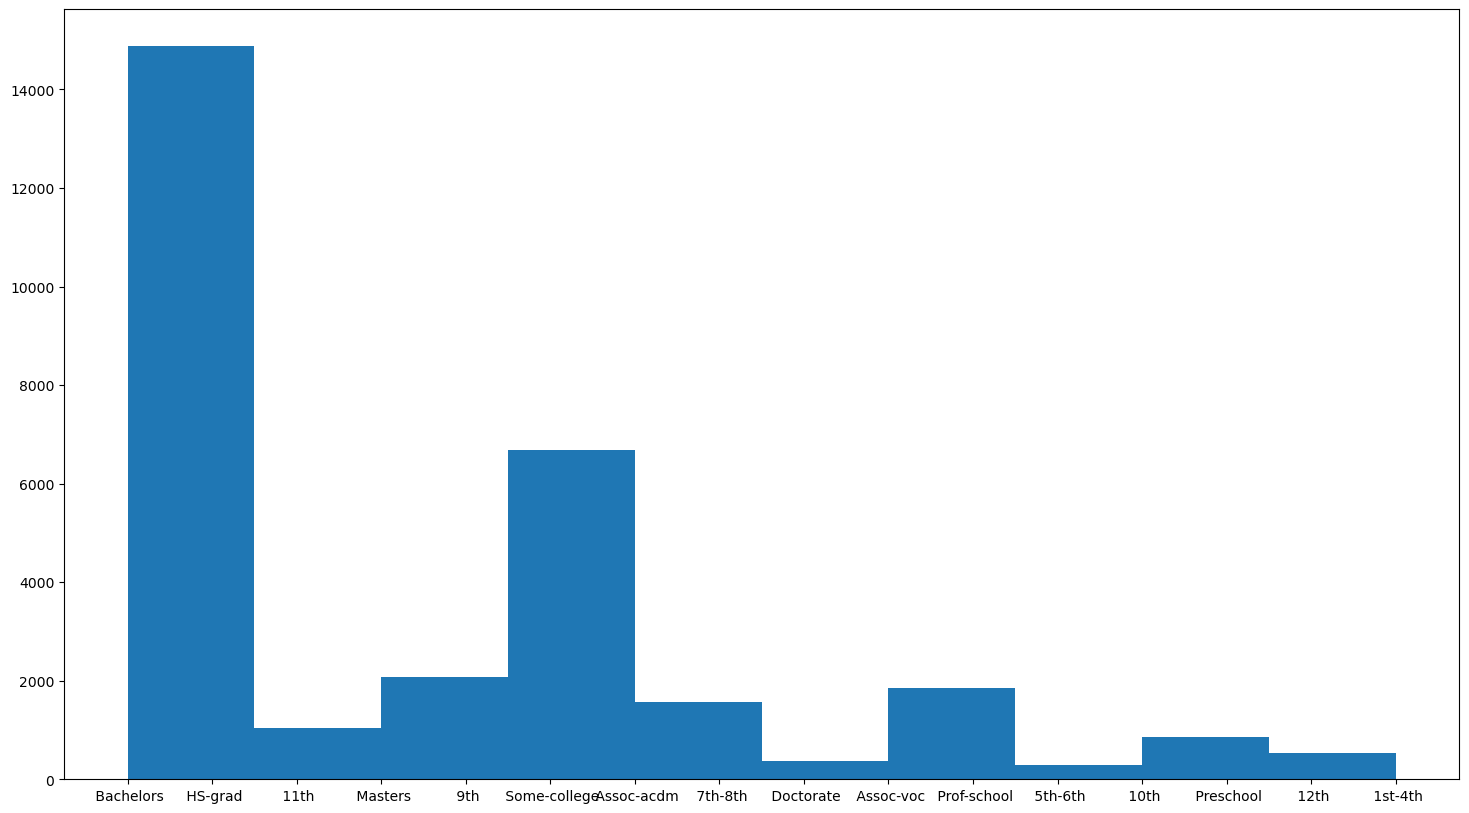

In [40]:
plt.figure(figsize=(18,10))
plt.hist(sdtrain.education);

In [41]:
sdtrain_label=sdtrain.copy()

In [42]:
sdtrain_label

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [44]:
sdtrain_label.iloc[:, -1] = le.fit_transform(sdtrain_label.iloc[:,-1])

In [45]:
sdtrain_label.Salary.value_counts()

0    22653
1     7508
Name: Salary, dtype: int64

In [46]:
sdtrain_label.iloc[:, 1] = le.fit_transform(sdtrain_label.iloc[:,1])
sdtrain_label.iloc[:, 2] = le.fit_transform(sdtrain_label.iloc[:,2])
sdtrain_label.iloc[:, 4] = le.fit_transform(sdtrain_label.iloc[:,4])
sdtrain_label.iloc[:, 5] = le.fit_transform(sdtrain_label.iloc[:,5])
sdtrain_label.iloc[:, 6] = le.fit_transform(sdtrain_label.iloc[:,6])
sdtrain_label.iloc[:, 7] = le.fit_transform(sdtrain_label.iloc[:,7])
sdtrain_label.iloc[:, 8] = le.fit_transform(sdtrain_label.iloc[:,8])
sdtrain_label.iloc[:, 12] = le.fit_transform(sdtrain_label.iloc[:,12])

In [47]:
sdtrain_label

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,0
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,1
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,0
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,0


In [48]:
sdtrain_label.workclass.value_counts()

2    22285
4     2499
1     2067
5     1279
3     1074
0      943
6       14
Name: workclass, dtype: int64

In [49]:
sdtrain_label.education.value_counts()

11    9840
15    6677
9     5044
12    1627
8     1307
1     1048
7     1008
0      820
5      557
14     542
6      455
2      377
10     375
4      288
3      151
13      45
Name: education, dtype: int64

In [50]:
sdtrain_label.maritalstatus.value_counts()

2    14065
4     9725
0     4214
5      939
6      827
3      370
1       21
Name: maritalstatus, dtype: int64

In [52]:
sdtrain_label.occupation.value_counts()

9     4038
2     4030
3     3992
0     3721
11    3584
7     3212
6     1965
13    1572
5     1350
4      989
12     912
10     644
8      143
1        9
Name: occupation, dtype: int64

In [53]:
sdtrain_label.relationship.value_counts()

0    12463
1     7726
3     4466
4     3212
5     1406
2      888
Name: relationship, dtype: int64

In [54]:
sdtrain_label.race.value_counts()

4    25932
2     2817
1      895
0      286
3      231
Name: race, dtype: int64

In [55]:
sdtrain_label.sex.value_counts()

1    20380
0     9781
Name: sex, dtype: int64

In [56]:
sdtrain_label.native.value_counts()

37    27504
24      610
28      188
10      128
31      109
1       107
17      100
7       100
4        92
8        86
21       80
33       71
2        68
20       68
5        67
38       64
12       63
22       59
29       56
3        56
18       42
34       42
13       42
30       34
25       33
27       30
11       29
9        27
6        27
19       24
15       19
0        18
36       18
23       17
35       17
39       16
26       14
16       13
14       12
32       11
Name: native, dtype: int64

# LABELS

workclass:Private=2,Self-emp-not-inc=4,Local-gov=1,State-gov=5,Self-emp-inc=3,Federal-gov=0,Without-pay=6
    

 education:HS-grad=11,Some-college=15,Bachelors=9,Masters=12,Assoc-voc=8,11th=1,Assoc-acdm=7,      10th=0,        7th-8th=5,          Prof-school=14,      9th=6,12th=2,             Doctorate=10,        5th-6th=4,          1st-4th=3,          Preschool=13         

maritalstatus:Married-civ-spouse=2,Never-married=4,Divorced=0,Separated=5,Widowed=6,Married-spouse-absent=3,Married-AF-spouse=1           

occupation:Prof-specialty=9,       Craft-repair=2,        Exec-managerial=3,     Adm-clerical=0,         Sales=11,              Other-service=7,       Machine-op-inspct=6,     Transport-moving=13,     Handlers-cleaners=5,    Farming-fishing=4,       Tech-support=12,          Protective-serv=10,       Priv-house-serv=8,       Armed-Forces=1           

relationship:Husband=0,            Not-in-family=1,       Own-child=3,           Unmarried=4,          Wife=5,                Other-relative=2      

race:White=4,                Black=2,                   Asian-Pac-Islander=1,       Amer-Indian-Eskimo=0,     Other=3                   

sex:Male=1,     Female=0   

native:United-States=37,                  Mexico=24,                         Philippines=28,                   Germany=10,                          Puerto-Rico=31,                      Canada=1,                           India=17,                            El-Salvador=7,                     Cuba=4,                             England=8,                          Jamaica=21,                        South=33,                          China=2,                             Italy=20,                             Dominican-Republic=5,                Vietnam=38,                           Guatemala=21,                         Japan=22,                             Poland=29,                            Columbia=3,                         Iran=18,                              Taiwan=34,                            Haiti=13,                             Portugal=30,                        Nicaragua=25,                        Peru=27,                              Greece=11,                            France=9,                            Ecuador=6,                           Ireland=19,                           Hong=15,                            Cambodia=0,                          Trinadad&Tobago=36,                   Laos=23,                              Thailand=35,                          Yugoslavia=39,                        Outlying-US(Guam-USVI-etc)=26,        Hungary=16,                           Honduras=14,                          Scotland=32                         

In [59]:
x_train=sdtrain_label.iloc[:,:-1]
y_train=sdtrain_label.iloc[:,-1]

In [60]:
x_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174,0,40,37
1,50,4,9,13,2,3,0,4,1,0,0,13,37
2,38,2,11,9,0,5,1,4,1,0,0,40,37
3,53,2,1,7,2,5,0,2,1,0,0,40,37
4,28,2,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37
30157,40,2,11,9,2,6,0,4,1,0,0,40,37
30158,58,2,11,9,6,0,4,4,0,0,0,40,37
30159,22,2,11,9,4,0,3,4,1,0,0,20,37


In [65]:
y_train

0        0
1        0
2        0
3        0
4        0
        ..
30156    0
30157    1
30158    0
30159    0
30160    1
Name: Salary, Length: 30161, dtype: int32

# Now we import SalaryData_Test dataset

In [66]:
sdtest=pd.read_csv('C:\\Users\\Akshay N R\\Desktop\\Data Science\\assignments\\naive bayes\\SalaryData_Test.csv')
sdtest

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


# EDA and Data Visualisation for Test dataset

In [68]:
sdtest.shape

(15060, 14)

In [67]:
sdtest.Salary.value_counts()

 <=50K    11360
 >50K      3700
Name: Salary, dtype: int64

In [69]:
sdtest.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


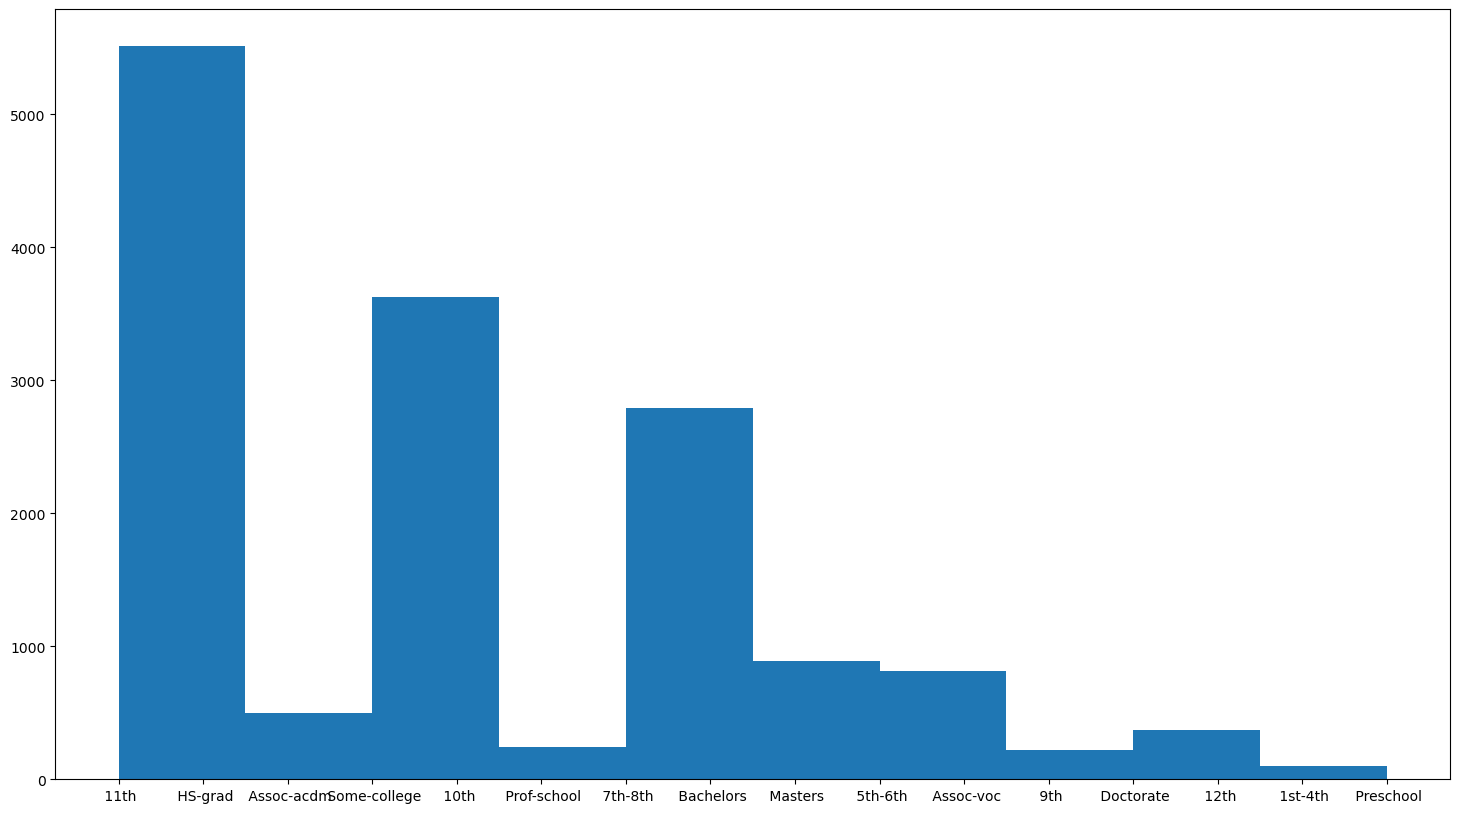

In [70]:
plt.figure(figsize=(18,10))
plt.hist(sdtest.education);

In [71]:
sdtest_label=sdtest.copy()

In [72]:
sdtest_label

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [73]:
sdtest_label.iloc[:, -1] = le.fit_transform(sdtest_label.iloc[:,-1])
sdtest_label.iloc[:, 1] = le.fit_transform(sdtest_label.iloc[:,1])
sdtest_label.iloc[:, 2] = le.fit_transform(sdtest_label.iloc[:,2])
sdtest_label.iloc[:, 4] = le.fit_transform(sdtest_label.iloc[:,4])
sdtest_label.iloc[:, 5] = le.fit_transform(sdtest_label.iloc[:,5])
sdtest_label.iloc[:, 6] = le.fit_transform(sdtest_label.iloc[:,6])
sdtest_label.iloc[:, 7] = le.fit_transform(sdtest_label.iloc[:,7])
sdtest_label.iloc[:, 8] = le.fit_transform(sdtest_label.iloc[:,8])
sdtest_label.iloc[:, 12] = le.fit_transform(sdtest_label.iloc[:,12])

In [74]:
sdtest_label

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,0
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,0
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,0
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,0


In [75]:
x_test=sdtest_label.iloc[:,:-1]
y_test=sdtest_label.iloc[:,-1]

In [76]:
x_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,2,1,7,4,6,3,2,1,0,0,40,37
1,38,2,11,9,2,4,0,4,1,0,0,50,37
2,28,1,7,12,2,10,0,4,1,0,0,40,37
3,44,2,15,10,2,6,0,2,1,7688,0,40,37
4,34,2,0,6,4,7,1,4,1,0,0,30,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37
15056,39,2,9,13,0,9,1,4,0,0,0,36,37
15057,38,2,9,13,2,9,0,4,1,0,0,50,37
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37


In [77]:
y_test

0        0
1        0
2        1
3        1
4        0
        ..
15055    0
15056    0
15057    0
15058    0
15059    1
Name: Salary, Length: 15060, dtype: int32

# Preparing Guassian naive bayes model for both Train dataset & Test dataset

In [78]:
# training the model on training set
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [79]:
y_pred_train = gnb.predict(x_train)
y_pred_train

array([0, 0, 0, ..., 0, 0, 1])

In [80]:
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_train, y_pred_train))
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_train, y_pred_train)*100)

Gaussian Naive Bayes model accuracy(in %): 0.7953317197705646
Gaussian Naive Bayes model accuracy(in %): 79.53317197705645


In [81]:
cm=confusion_matrix(y_train, y_pred_train)
cm

array([[21505,  1148],
       [ 5025,  2483]], dtype=int64)

In [83]:
# making predictions on the testing set
y_pred_test = gnb.predict(x_test)
y_pred_test

array([0, 0, 0, ..., 0, 1, 0])

In [84]:
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred_test)*100)

Gaussian Naive Bayes model accuracy(in %): 79.46879150066401


In [85]:
cm=confusion_matrix(y_test, y_pred_test)
cm

array([[10759,   601],
       [ 2491,  1209]], dtype=int64)

Here we observe that the Guassian Naive Bayes model gave almost same accuracy for our both Salarydtata_Train & salaryData_Test datasets.
Hence we prepared a classification model using Naive bayes for salary data.